In [24]:
import pandas as pd
import pandas_datareader.data as pdweb

import numpy as np

from datetime import datetime
from tqdm import tqdm

import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 300
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('seaborn-white')

In [83]:
tickers_ibov = pd.read_excel('ibov_tickers_2020-01-04.xlsx')

In [84]:
lista_tickers = list(tickers_ibov.iloc[:, 0] + '.SA')

In [73]:
lista_tickers = pd.read_csv('segmentos.csv', encoding='latin1')

In [76]:
lista_tickers = list(segmentos['Ticker'].dropna() + '.SA')

In [85]:
data = pd.DataFrame()
for ticker in tqdm(lista_tickers):
    try:
        x = pdweb.DataReader(ticker, 'yahoo', start='2000-01-01', end='2021-01-04')
        data = pd.concat([data, x['Adj Close'].rename(ticker[:-3])], axis=1)
    except:
        print(ticker)
        pass

100%|██████████| 81/81 [01:42<00:00,  1.26s/it]


In [86]:
data.columns

Index(['ABEV3', 'AZUL4', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4', 'BBSE3', 'BEEF3',
       'BPAC11', 'BRAP4', 'BRDT3', 'BRFS3', 'BRKM5', 'BRML3', 'BTOW3', 'CCRO3',
       'CIEL3', 'CMIG4', 'COGN3', 'CPFE3', 'CPLE6', 'CRFB3', 'CSAN3', 'CSNA3',
       'CVCB3', 'CYRE3', 'ECOR3', 'EGIE3', 'ELET3', 'ELET6', 'EMBR3', 'ENBR3',
       'ENEV3', 'ENGI11', 'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4', 'GNDI3', 'GOAU4',
       'GOLL4', 'HAPV3', 'HGTX3', 'HYPE3', 'IGTA3', 'IRBR3', 'ITSA4', 'ITUB4',
       'JBSS3', 'JHSF3', 'KLBN11', 'LAME4', 'LCAM3', 'LREN3', 'MGLU3', 'MRFG3',
       'MRVE3', 'MULT3', 'NTCO3', 'PCAR3', 'PETR3', 'PETR4', 'PRIO3', 'QUAL3',
       'RADL3', 'RAIL3', 'RENT3', 'SANB11', 'SBSP3', 'SULA11', 'SUZB3',
       'TAEE11', 'TIMS3', 'TOTS3', 'UGPA3', 'USIM5', 'VALE3', 'VIVT3', 'VVAR3',
       'WEGE3', 'YDUQ3'],
      dtype='object')

In [87]:
retornos = np.log(data / data.shift(1))

In [88]:
correlation = []

for i in tqdm(range(retornos.shape[0], 0, -1)):
    x = retornos.iloc[i-30:i].copy()
    corr = x.corr()
    corr = (corr.sum().sum() - corr.shape[1]) / (corr.shape[1]**2 - corr.shape[1])
    correlation.append(corr)

100%|██████████| 5279/5279 [00:03<00:00, 1342.96it/s]


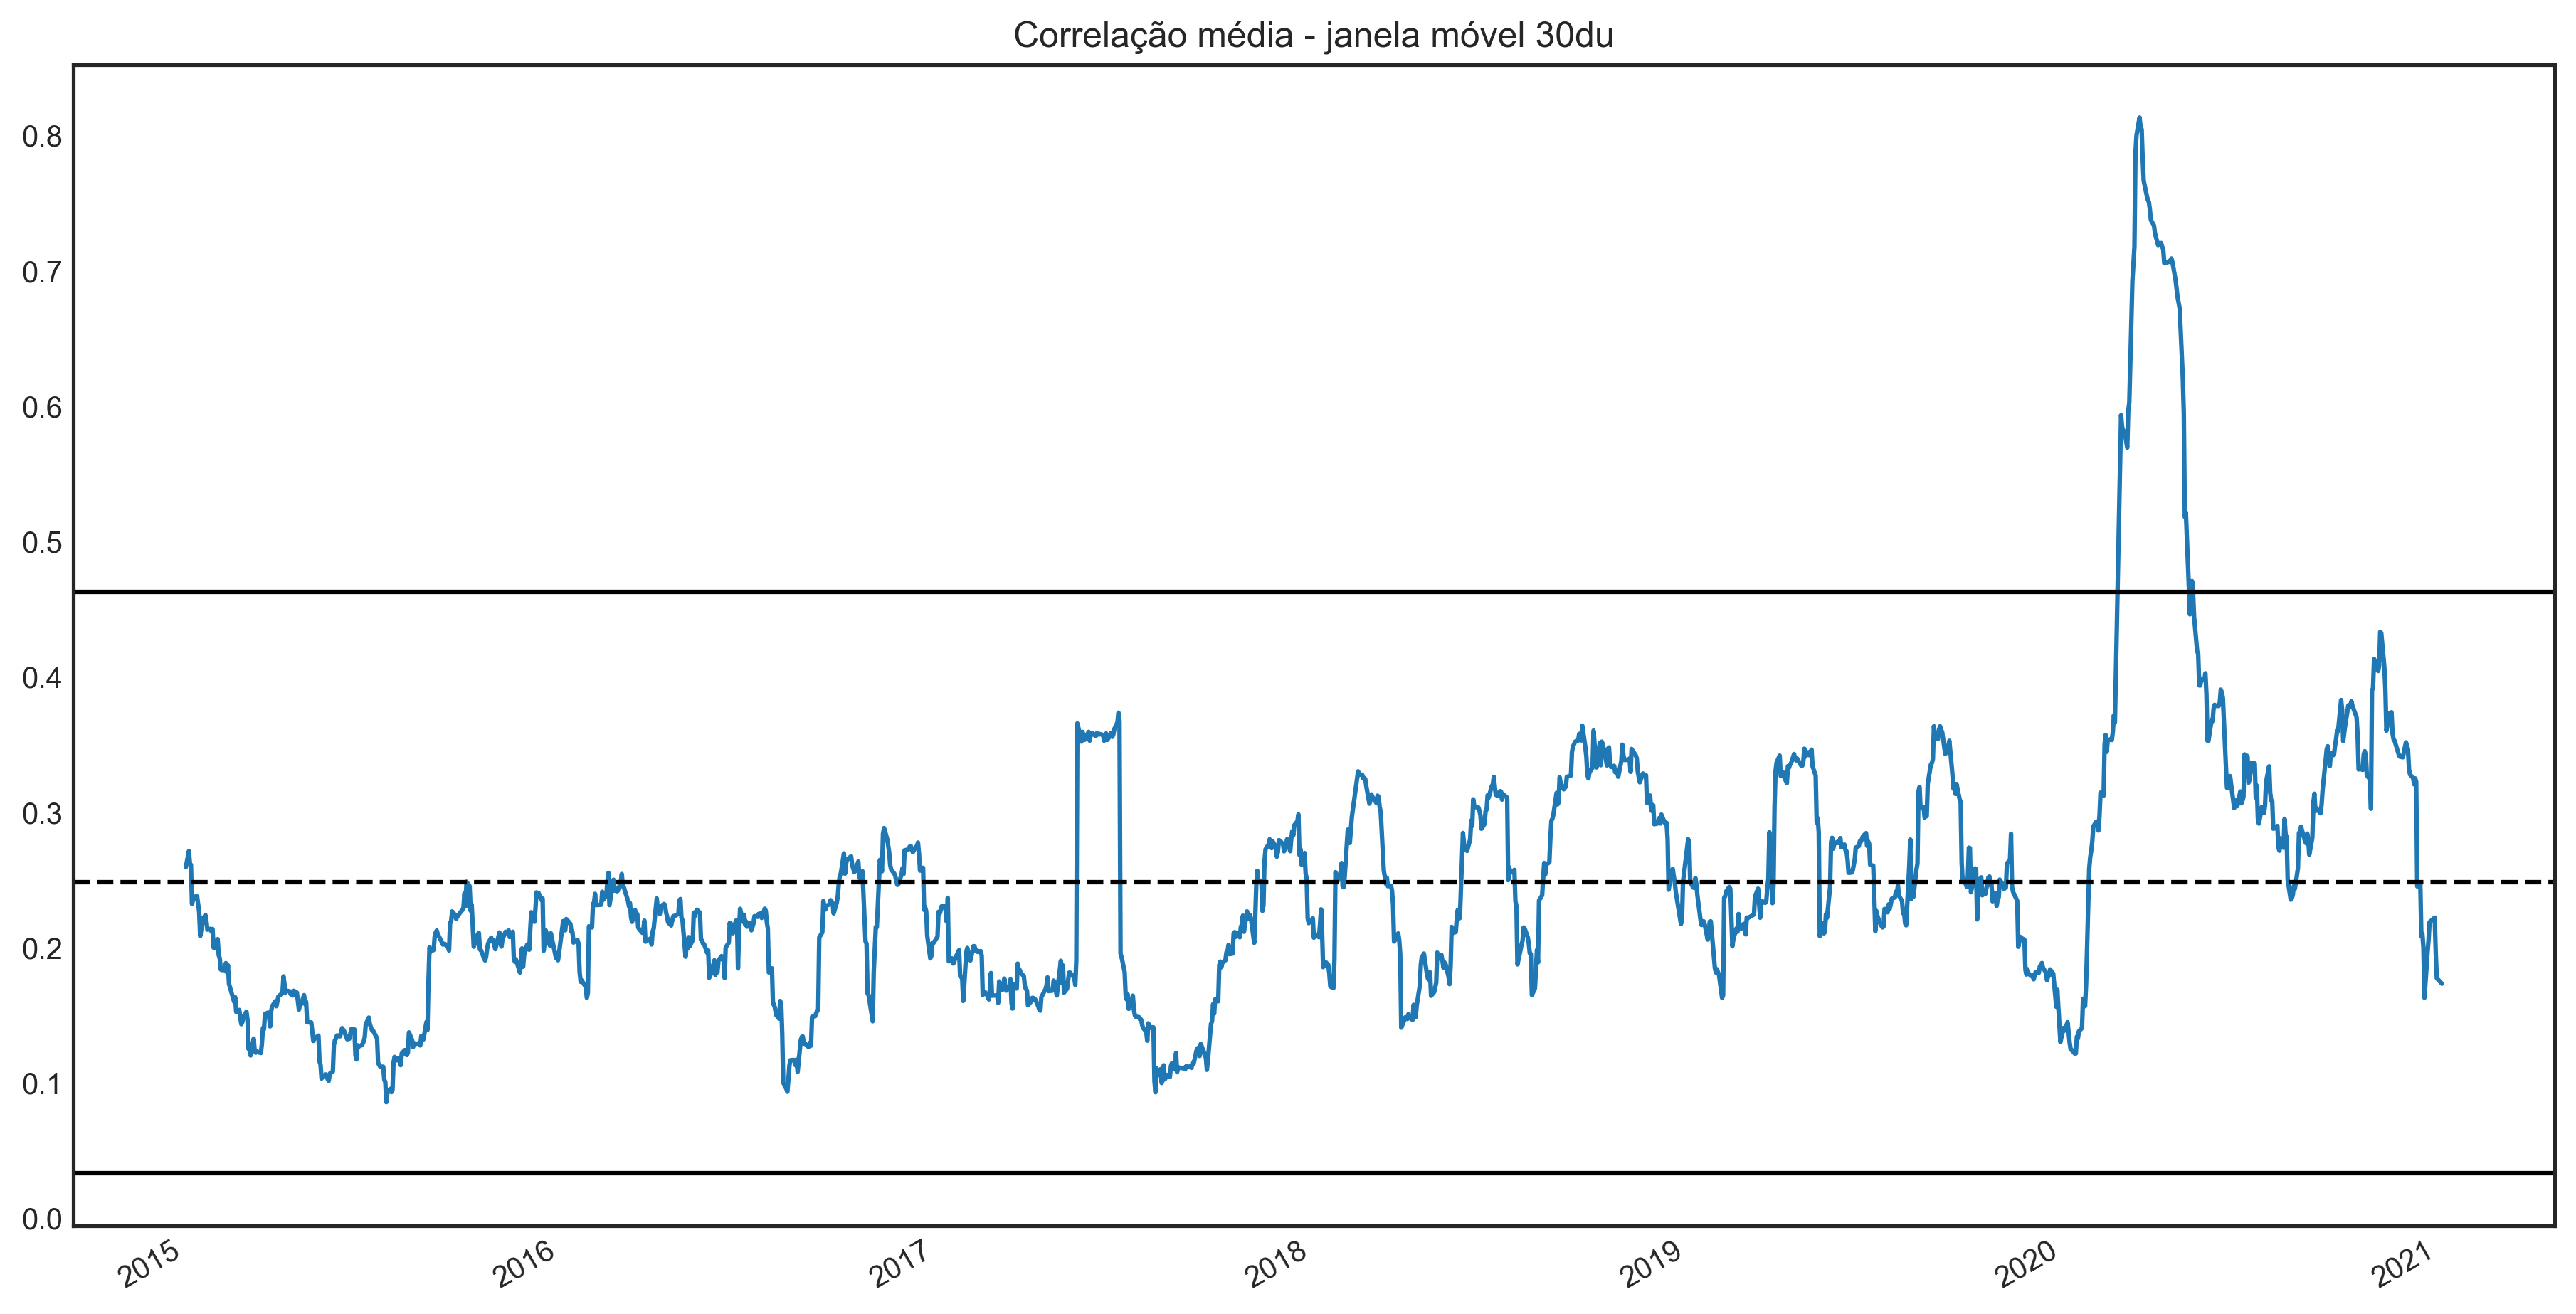

In [105]:
corr_historica = pd.Series(correlation[::-1])
corr_historica.index = retornos.index[-corr_historica.shape[0]:]
corr_historica.loc['2015':].plot(title='Correlação média - janela móvel 30du')

plt.axhline(corr_historica.loc['2015':].mean(), color='black', linestyle='--')
plt.axhline(corr_historica.loc['2015':].mean() + corr_historica.loc['2015':].std() * 2, color='black')
plt.axhline(corr_historica.loc['2015':].mean() - corr_historica.loc['2015':].std() * 2, color='black')
#ibov['Close'].loc['2006-09-01':].plot(secondary_y=True)

(0, 1.5)

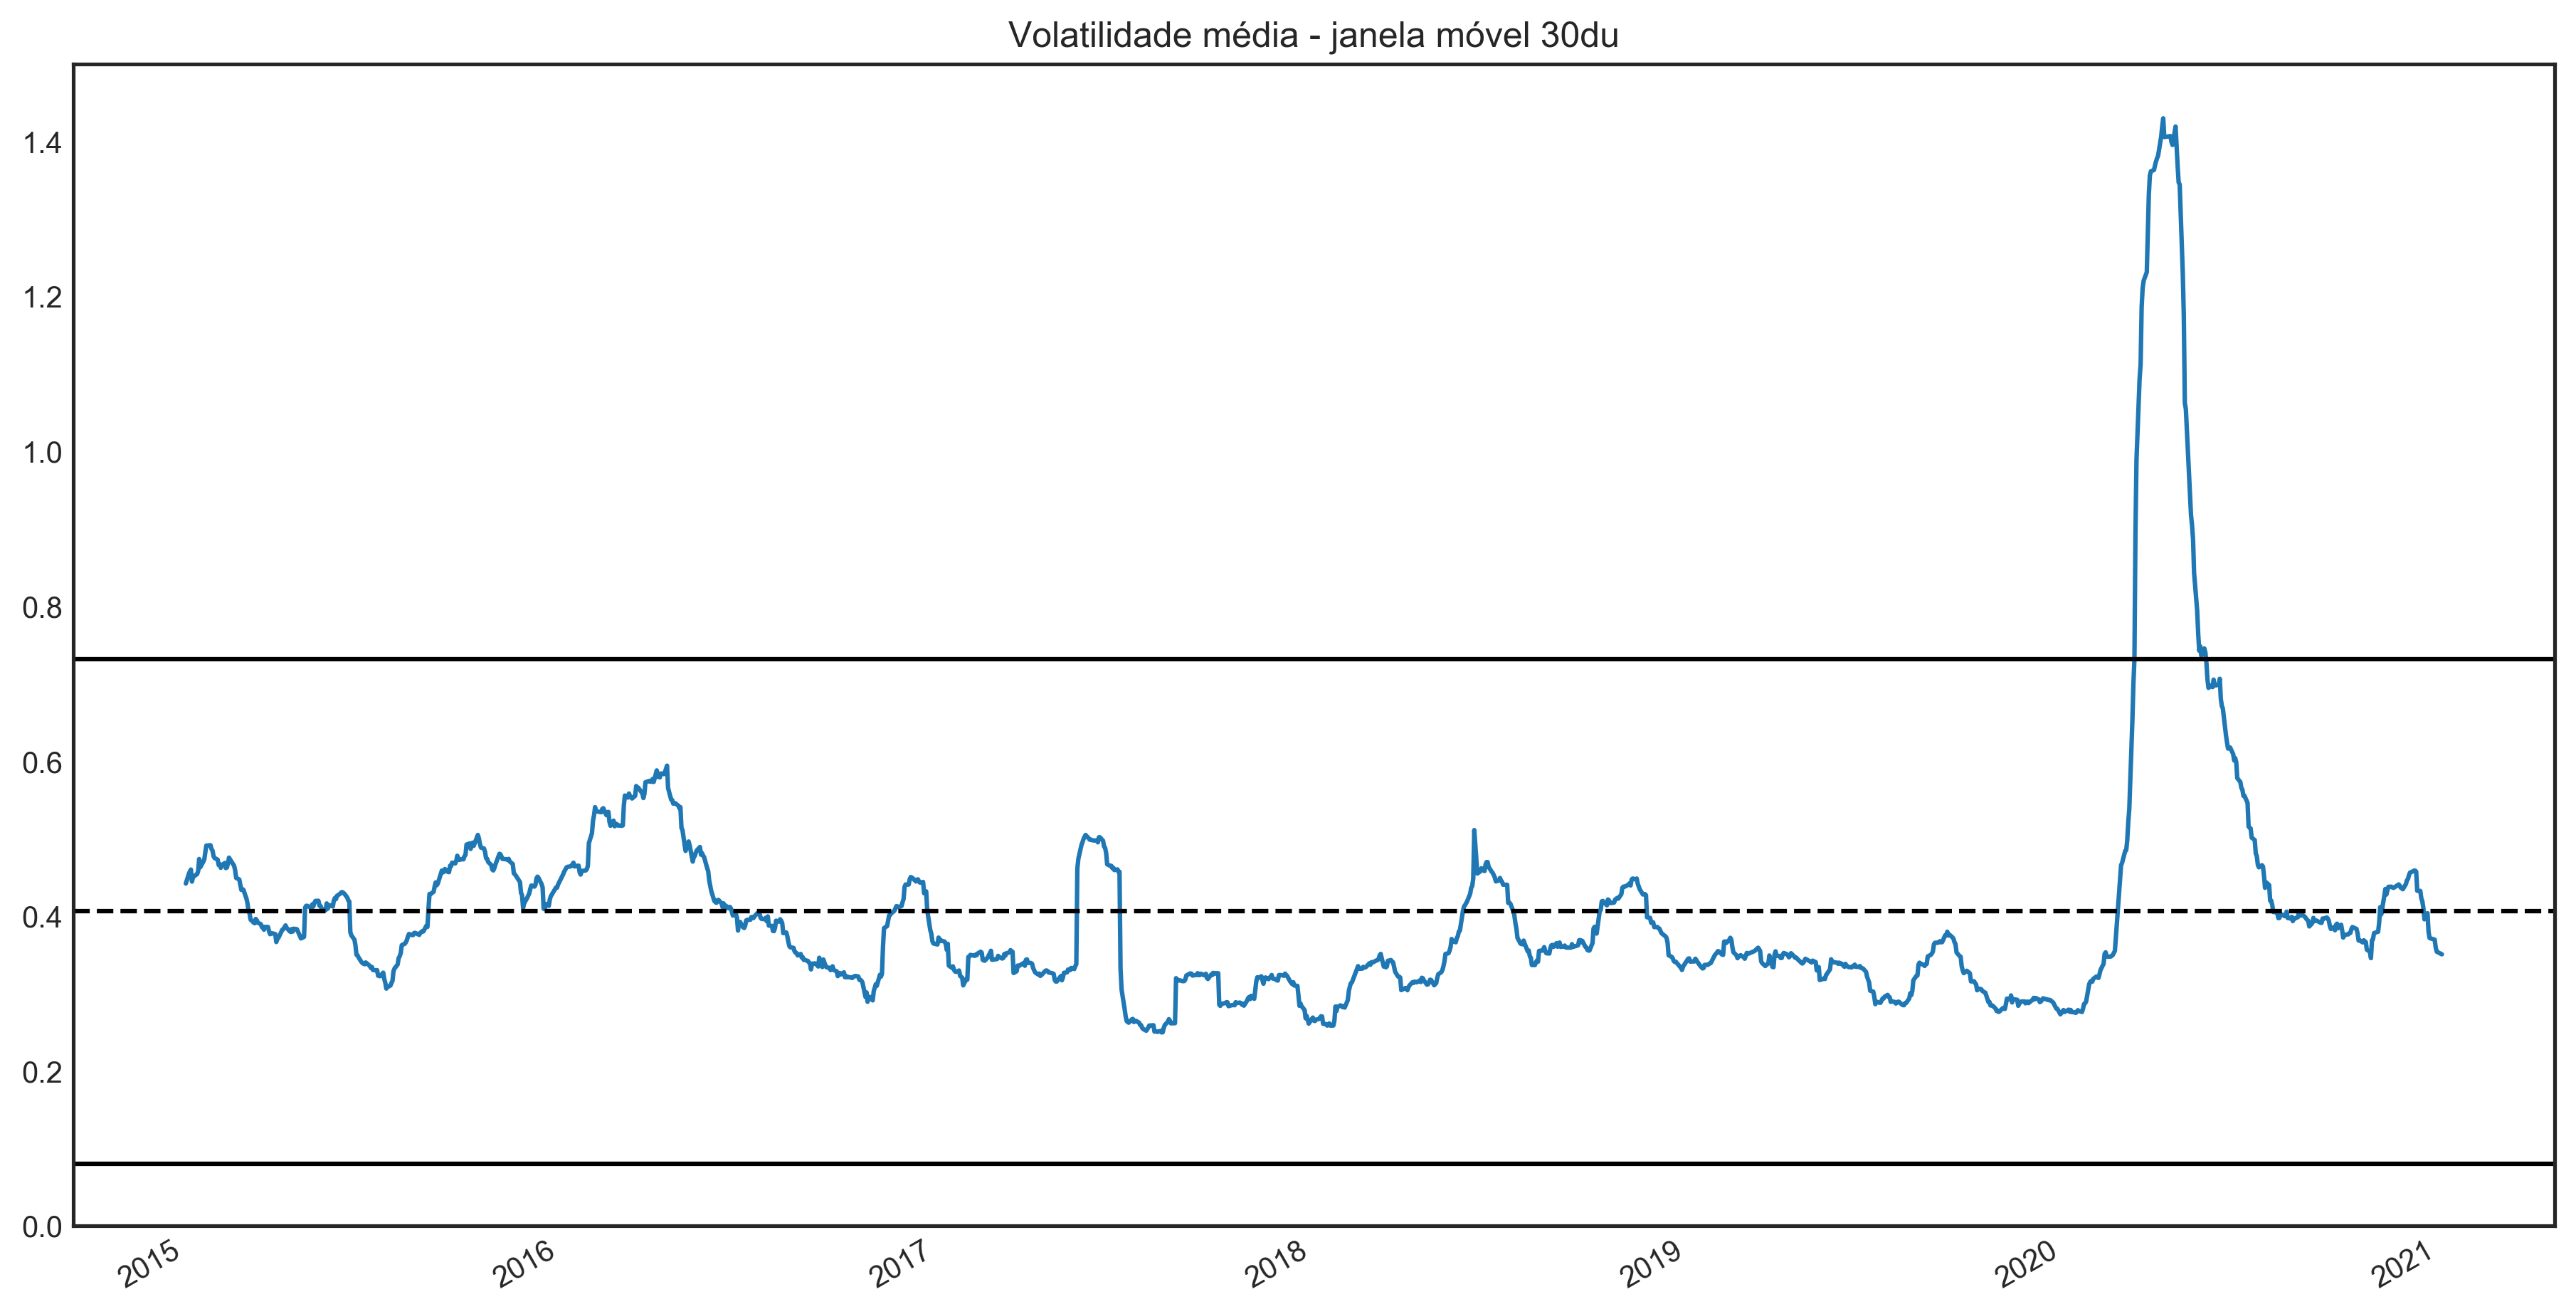

In [106]:
std_hist = (retornos.rolling(30).std() * np.sqrt(252)).mean(1).loc['2015':]
std_hist.plot()
plt.axhline(std_hist.mean(), color='black', linestyle='--')
plt.axhline(std_hist.mean() + std_hist.std() * 2, color='black')
plt.axhline(std_hist.mean() - std_hist.std() * 2, color='black')
plt.title('Volatilidade média - janela móvel 30du')
plt.ylim((0, 1.5))

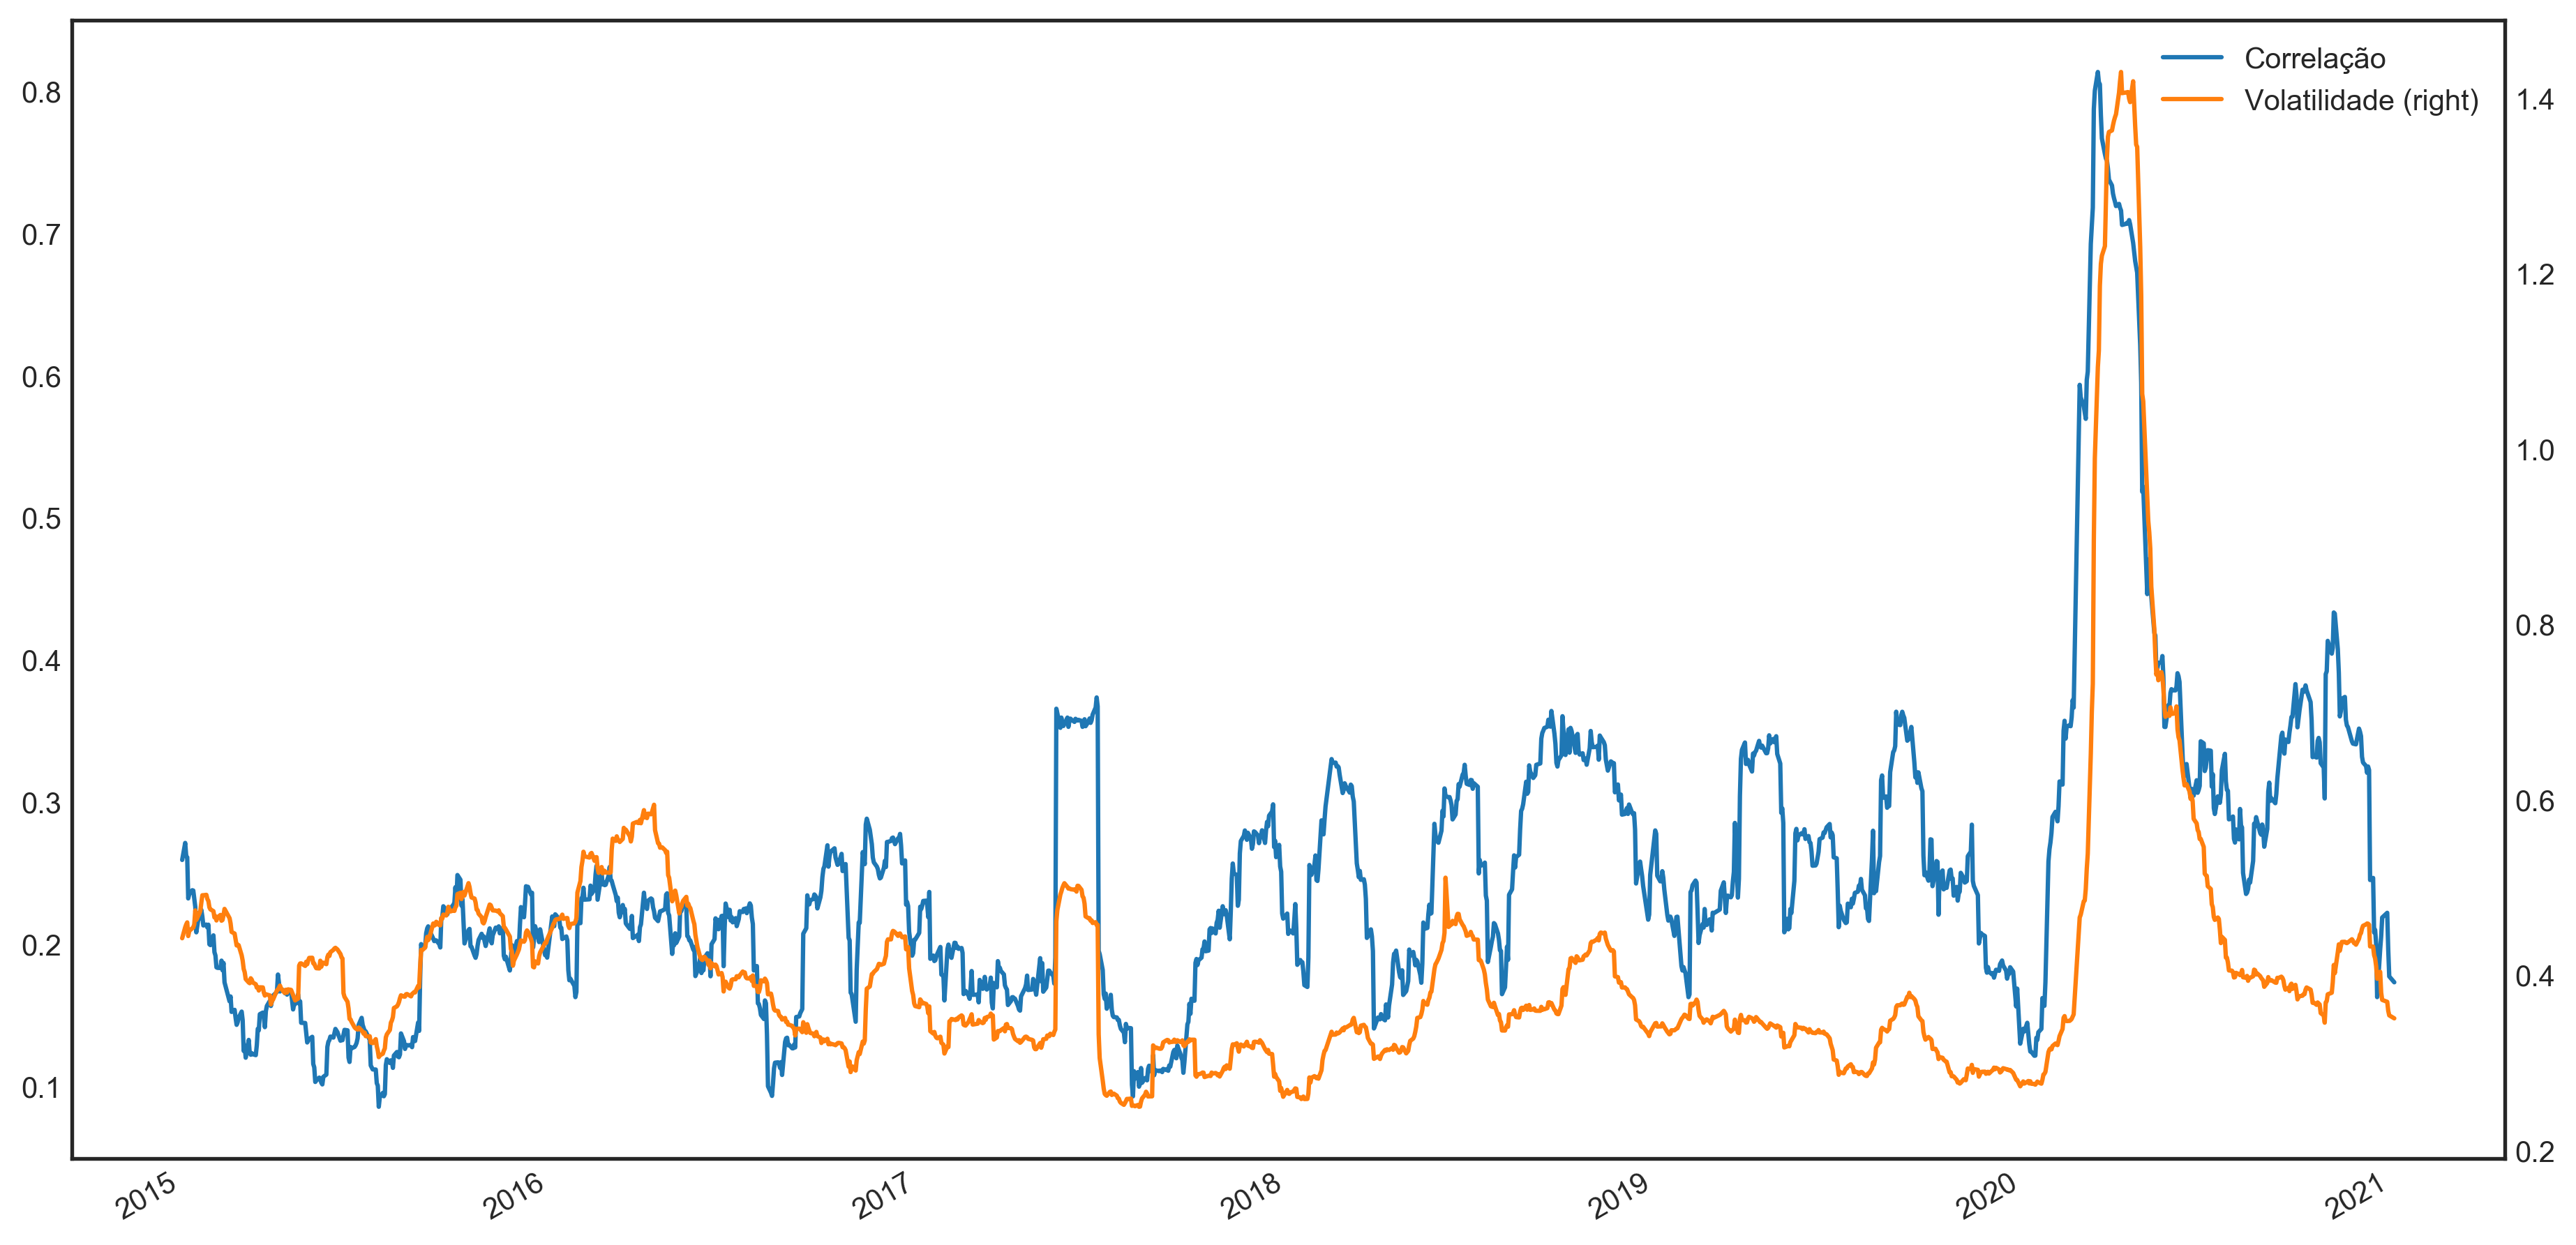

In [117]:
corr_historica = pd.Series(correlation[::-1])
corr_historica.index = retornos.index[-corr_historica.shape[0]:]
corr_historica.loc['2015':].plot(label='Correlação', legend=True)

std_hist = (retornos.rolling(30).std() * np.sqrt(252)).mean(1).loc['2015':]
std_hist.plot(label='Volatilidade', legend=True, secondary_y=True)

#ibov['Close'].loc['2006-09-01':].plot(secondary_y=True)